- **Project Objective:**  
In this project, we will predict real estate prices using artificial neural networks.

- **Dataset Information:**  
Dataset includes house sale prices for King County in the USA and homes that were sold in the time period between May 2014 and May 2015.

- **Columns:**
  - `id`: Notation for a house
  - `date`: Date house was sold
  - `price`: Price is the prediction target
  - `bedrooms`: Number of bedrooms per house
  - `bathrooms`: Number of bathrooms per house
  - `sqft_living`: Square footage of the home
  - `qft_lot`: Square footage of the lot
  - `floors`: Total floors (levels) in the house
  - `waterfront`: House which has a view to a waterfront
  - `view`: Has been viewed
  - `condition`: How good the condition is
  - `grade`: Overall grade given to the housing unit, based on King County grading system
  - `sqft_abovesquare`: Footage of house apart from basement
  - `sqft_basement`: Square footage of the basement
  - `yr_built`: Built year
  - `yr_renovated`: Year when the house was renovated
  - `zipcode`: ZIP code
  - `lat`: Latitude coordinate
  - `long`: Longitude coordinate
  - `sqft_living15`: Living room area in 2015 (implies some renovations)
  - `sqft_lot15`: Lot size area in 2015 (implies some renovations)





# Reading Data

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


# EDA

In [2]:
df = pd.read_csv("realestate_prices.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S")


In [4]:
df["building_age"] = 2015 - df["yr_built"]  # Use the current year

df["renovation_age"] = df["yr_renovated"].apply(lambda x: 0 if x == 0 else 2015 - x)  # Use the current year



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

In [6]:
df1 = df.drop(columns=["date", "id", "zipcode", "lat", "long", "yr_built", "yr_renovated"], axis=1)
df_des = df1.describe().T
df_skew = df1.skew().to_frame("Skew")
df_kurt = df1.kurtosis().to_frame("Kurtosis")
describe = pd.concat([df_des, df_kurt, df_skew], axis=1)

describe

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skew
price,21613.0,540088.141767,367127.196483,75000.0,321950.00,450000.00,645000.0,7700000.0,34.585540,4.024069
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0,49.063653,1.974300
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0,1.279902,0.511108
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0,5.243093,1.471555
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0,285.077820,13.060019
floors,21613.0,1.494309,0.539989,1.0,1.00,1.50,2.0,3.5,-0.484723,0.616177
waterfront,21613.0,0.007542,0.086517,0.0,0.00,0.00,0.0,1.0,127.632494,11.385108
view,21613.0,0.234303,0.766318,0.0,0.00,0.00,0.0,4.0,10.893022,3.395750
condition,21613.0,3.409430,0.650743,1.0,3.00,3.00,4.0,5.0,0.525764,1.032805
grade,21613.0,7.656873,1.175459,1.0,7.00,7.00,8.0,13.0,1.190932,0.771103


# data Visualization

<Axes: >

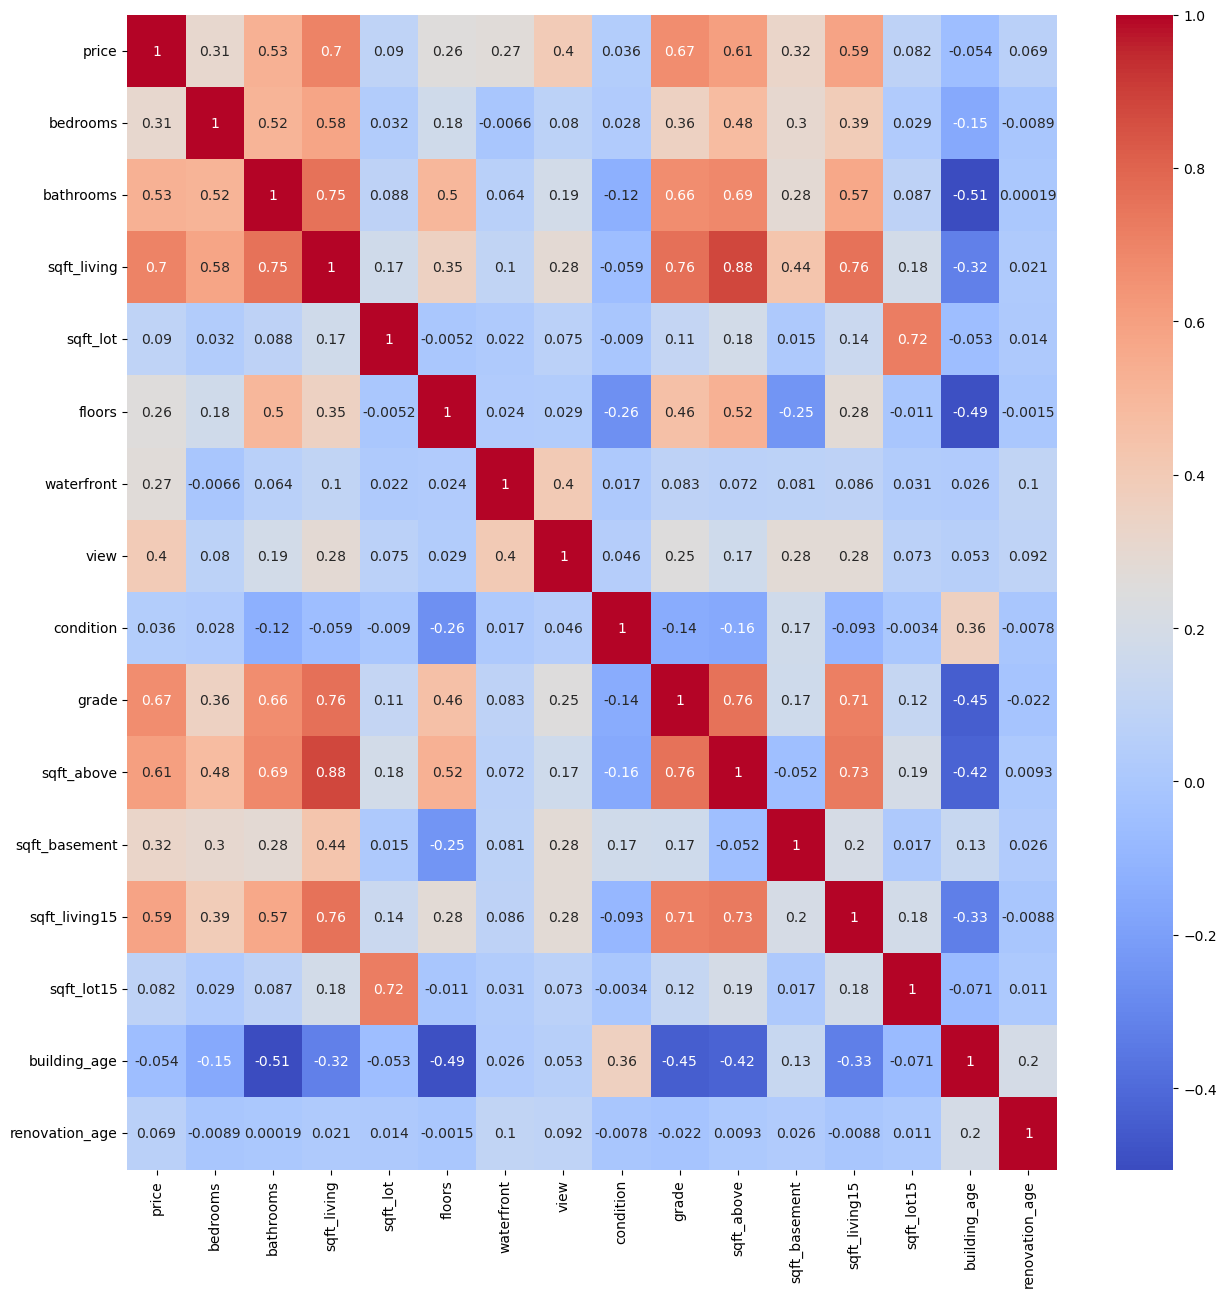

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))

sns.heatmap(df1.corr(), annot=True, cmap="coolwarm")

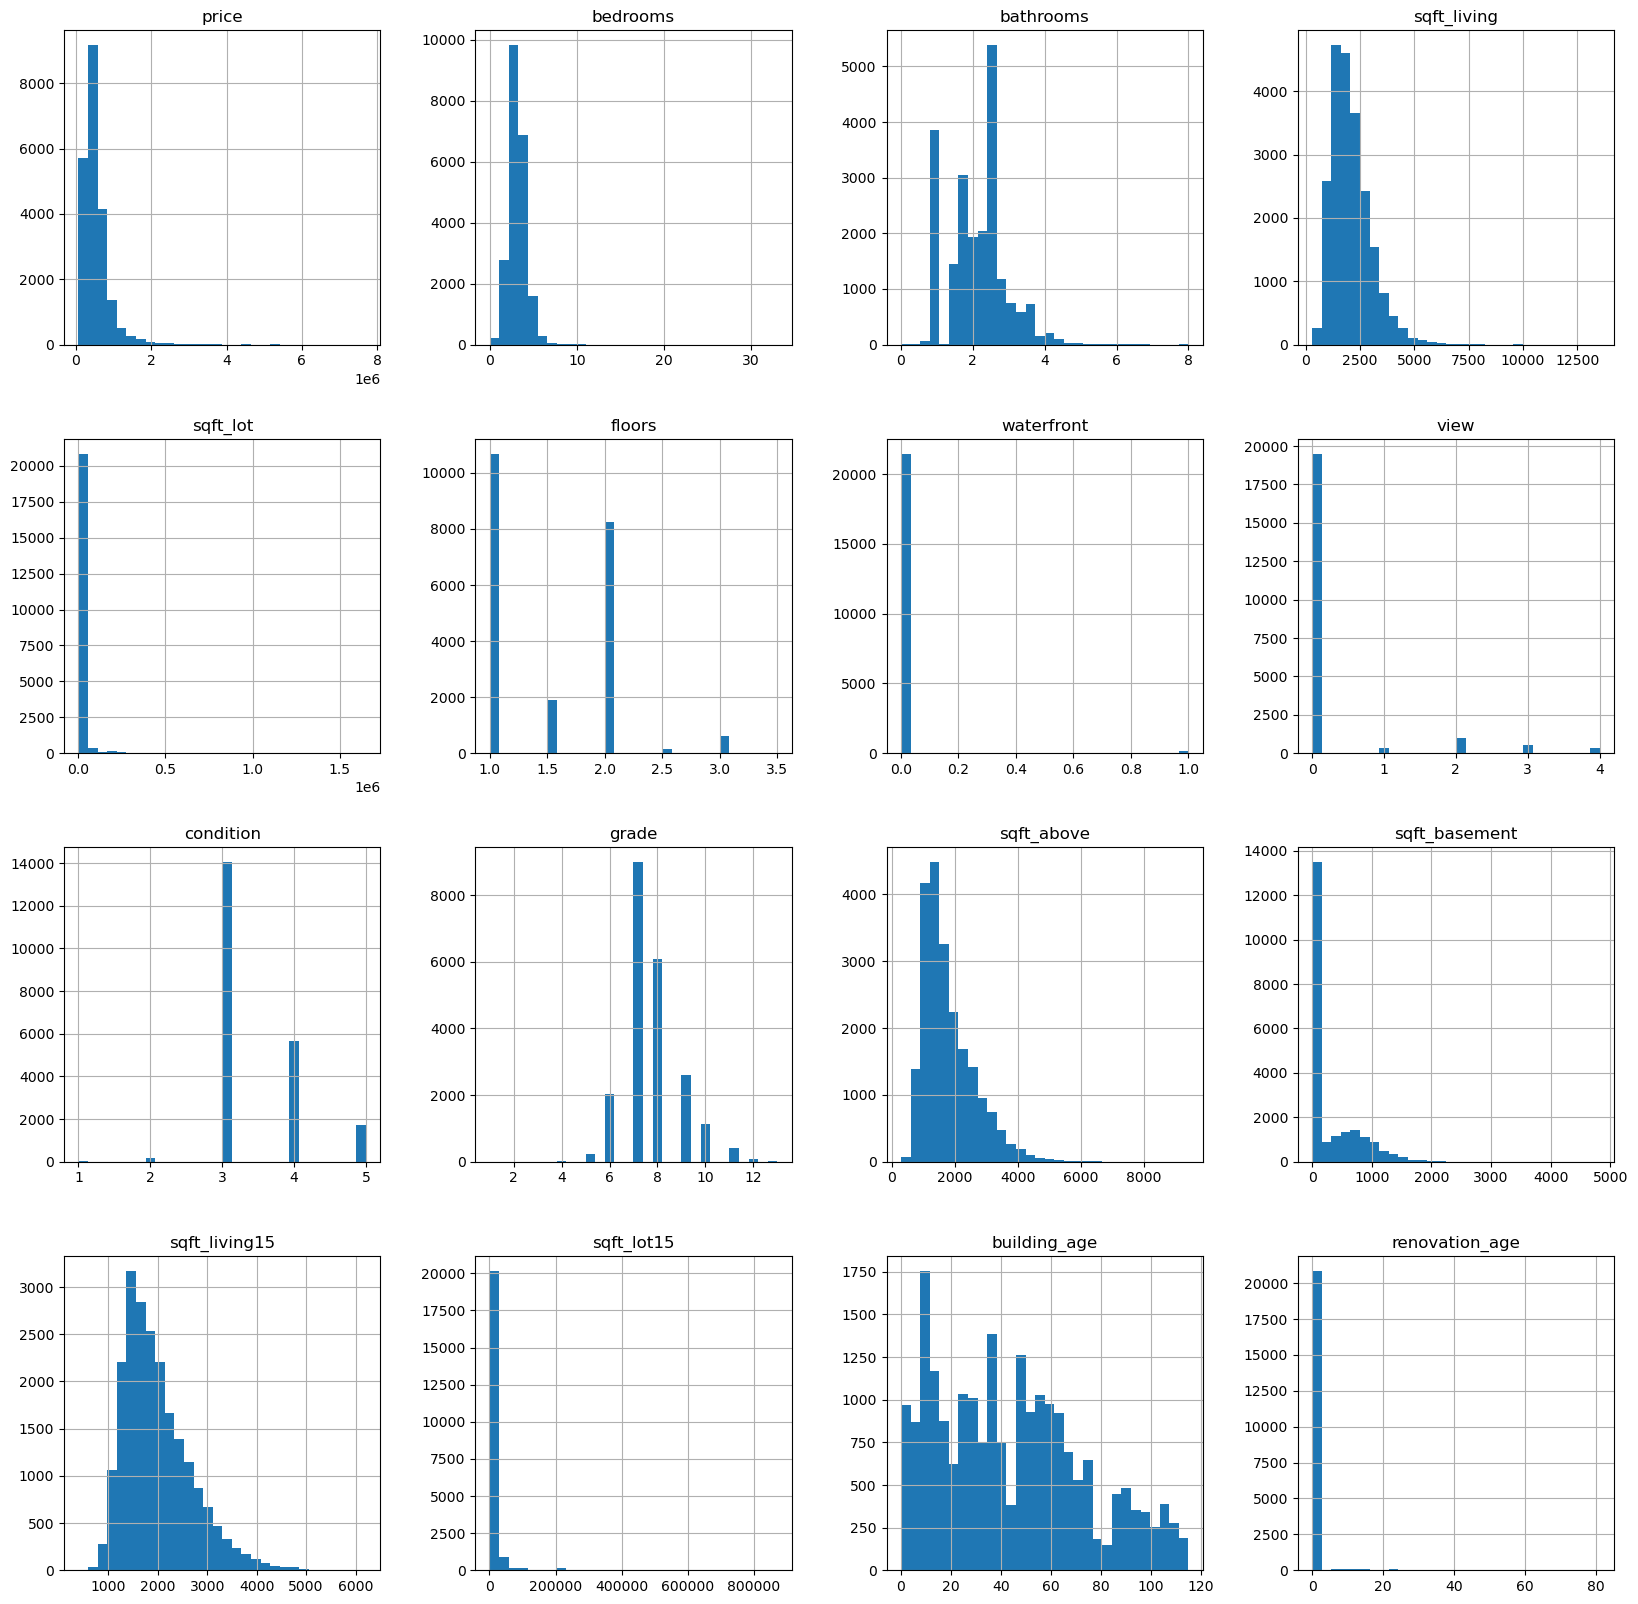

In [8]:
df1.hist(bins=30, figsize=(20, 20))

plt.show()

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  float64
 1   bedrooms        21613 non-null  int64  
 2   bathrooms       21613 non-null  float64
 3   sqft_living     21613 non-null  int64  
 4   sqft_lot        21613 non-null  int64  
 5   floors          21613 non-null  float64
 6   waterfront      21613 non-null  int64  
 7   view            21613 non-null  int64  
 8   condition       21613 non-null  int64  
 9   grade           21613 non-null  int64  
 10  sqft_above      21613 non-null  int64  
 11  sqft_basement   21613 non-null  int64  
 12  sqft_living15   21613 non-null  int64  
 13  sqft_lot15      21613 non-null  int64  
 14  building_age    21613 non-null  int64  
 15  renovation_age  21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


<Figure size 1500x1500 with 0 Axes>

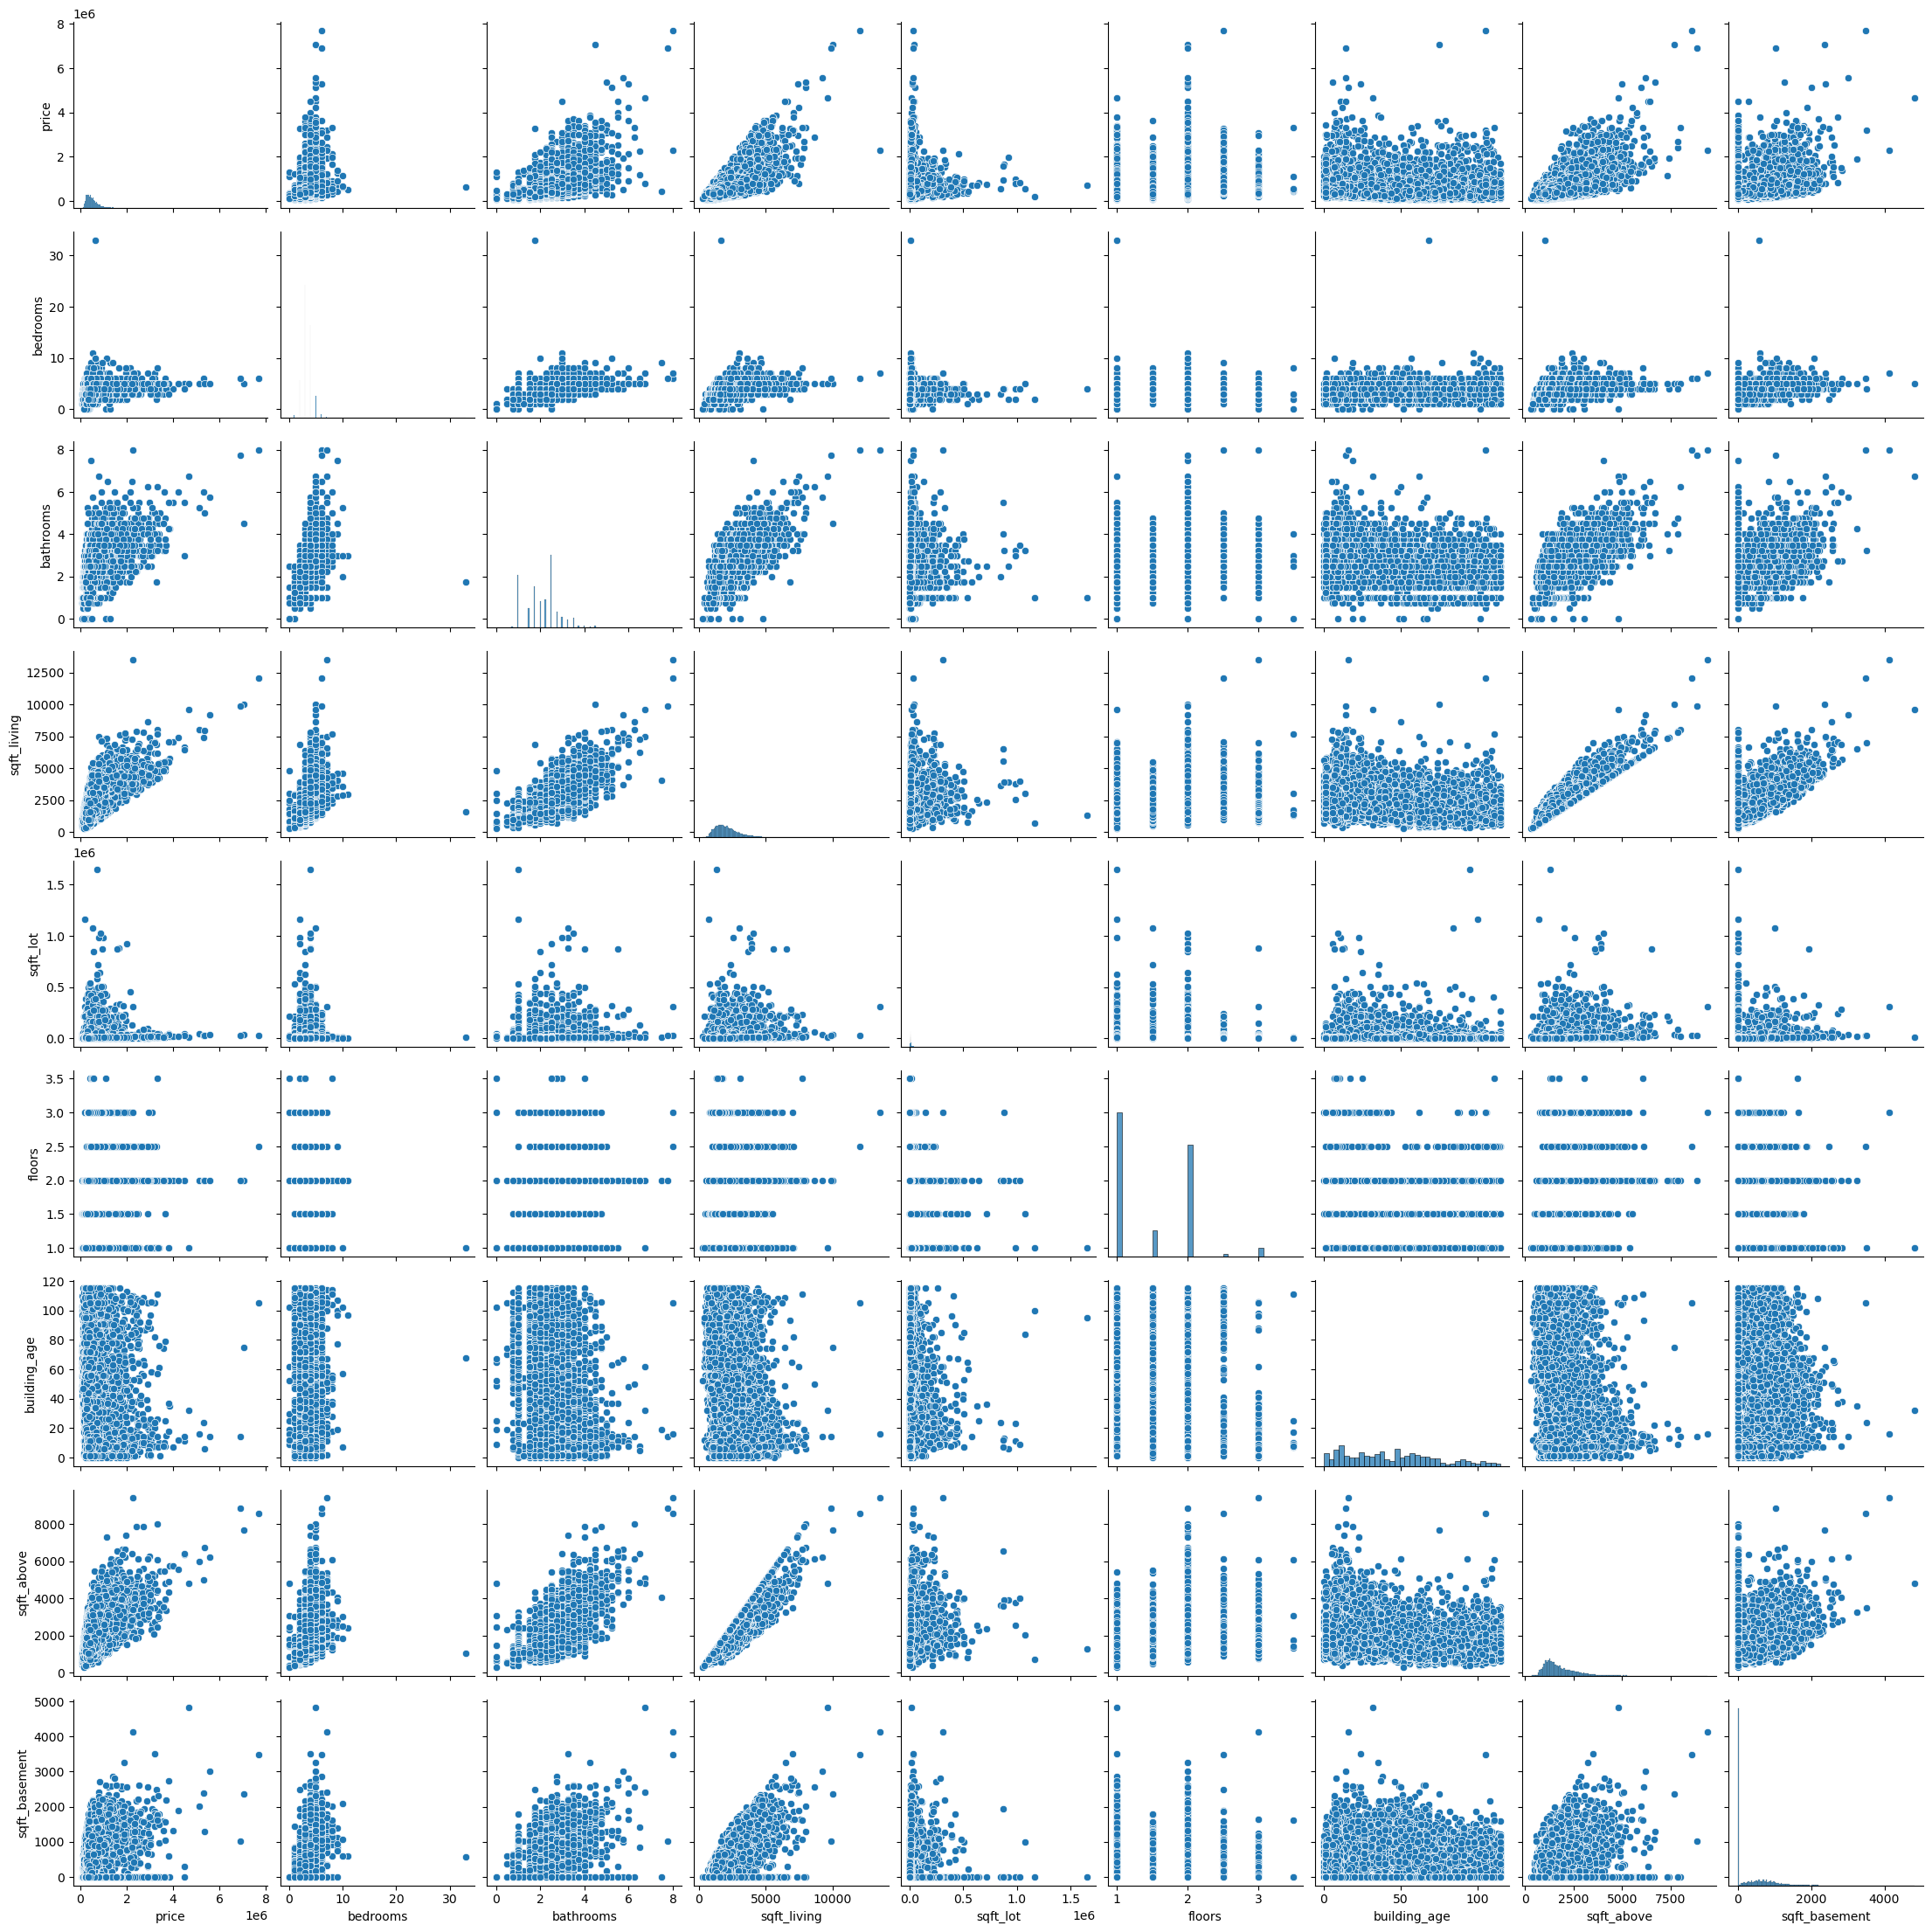

In [10]:
pairplot_data = [ "price","bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "building_age", "sqft_above", "sqft_basement"]

plt.figure(figsize=(15, 15))
sns.pairplot(df1[pairplot_data])
plt.show()

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21613 non-null  float64
 1   bedrooms        21613 non-null  int64  
 2   bathrooms       21613 non-null  float64
 3   sqft_living     21613 non-null  int64  
 4   sqft_lot        21613 non-null  int64  
 5   floors          21613 non-null  float64
 6   waterfront      21613 non-null  int64  
 7   view            21613 non-null  int64  
 8   condition       21613 non-null  int64  
 9   grade           21613 non-null  int64  
 10  sqft_above      21613 non-null  int64  
 11  sqft_basement   21613 non-null  int64  
 12  sqft_living15   21613 non-null  int64  
 13  sqft_lot15      21613 non-null  int64  
 14  building_age    21613 non-null  int64  
 15  renovation_age  21613 non-null  int64  
dtypes: float64(3), int64(13)
memory usage: 2.6 MB


In [12]:
selected = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot","floors", "sqft_above", "sqft_basement"]

In [15]:
X = df1[selected]
X.shape

(21613, 7)

In [16]:
y = df1["price"]
y.shape

(21613,)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X) 

X_scaled


array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [20]:
X_scaled.shape

(21613, 7)

In [24]:
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])